<a href="https://colab.research.google.com/github/Harsha194/Elevate_Labs_Tasks/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K=1 --> Accuracy: 0.9333
K=3 --> Accuracy: 0.9111
K=5 --> Accuracy: 0.9111


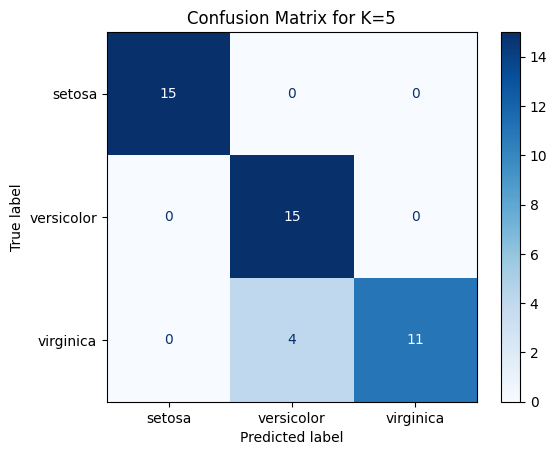

K=7 --> Accuracy: 0.9333
K=9 --> Accuracy: 0.9556


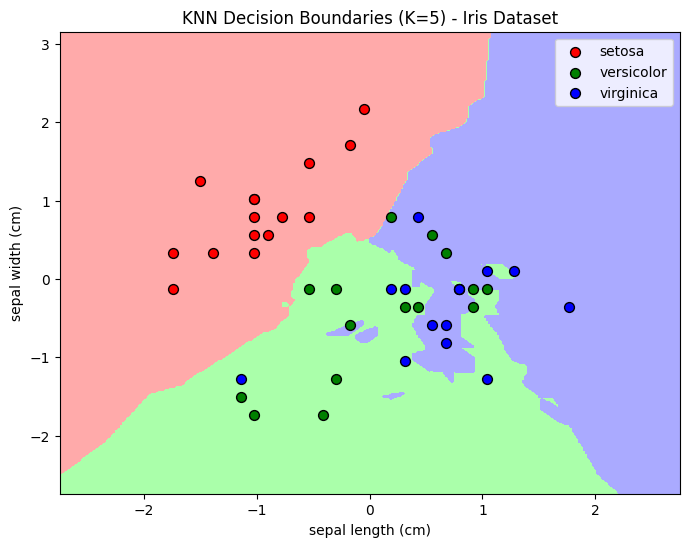

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K={k} --> Accuracy: {acc:.4f}")


    if k == 5:
        cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for K={k}')
        plt.show()


import matplotlib.colors as colors

def plot_decision_boundaries(X, y, model, title):
    cmap_light = colors.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    for idx, class_label in enumerate(np.unique(y)):
        plt.scatter(X[y == class_label, 0], X[y == class_label, 1],
                    c=cmap_bold[idx], label=target_names[class_label],
                    edgecolor='k', s=50)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.legend()
    plt.show()


X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_2d, y_train)

plot_decision_boundaries(X_test_2d, y_test, knn_2d, "KNN Decision Boundaries (K=5) - Iris Dataset")
